In [72]:
import csv
import pandas as pd
import pyDOE2

In [73]:
class ActiveSys(object):
    def __init__(self, name, min, max, type):
        self.Name=name
        self.Min = min
        self.Max = max
        self.Type = type

In [110]:
# Read user input
input = pd.read_csv('input_max.csv')
print("%d Systems..." % len(input))

10 Systems...


In [111]:
myFF = pyDOE2.fullfact([2,2,2,2,2,2,2,2,2,2,2])
# myCCD= pyDOE2.ccdesign(10, center=[0,1],alpha='o', face='ccf')
myCCD = pyDOE2.ccdesign(len(input), center=(0,1), face='ccf')
myBBD = pyDOE2.bbdesign(len(input), center=1)
myGSD = pyDOE2.gsd([2,2,2,3,2,2,2,2,2,2], 2)

In [112]:
# with open("ff.csv","w+") as my_csv:
#     csvWriter = csv.writer(my_csv,delimiter=',')
#     csvWriter.writerows(myFF)

# with open("ccd.csv","w+") as my_csv:
#     csvWriter = csv.writer(my_csv,delimiter=',')
#     csvWriter.writerows(myCCD)
    
# with open("bbd.csv","w+") as my_csv:
#     csvWriter = csv.writer(my_csv,delimiter=',')
#     csvWriter.writerows(myBBD)
    
# with open("gsd.csv","w+") as my_csv:
#     csvWriter = csv.writer(my_csv,delimiter=',')
#     csvWriter.writerows(myGSD)

In [113]:
print("FF is %d rows" % len(myFF))
print("CCD is %d rows" % len(myCCD))
print("BBD is %d rows" % len(myBBD))
print("GSD is %d rows" % len(myGSD))


FF is 2048 rows
CCD is 1045 rows
BBD is 181 rows
GSD is 768 rows


In [114]:
# Create Systems
systems = []
# Iterate over input, create a list of cid systems
for row in input.itertuples():
    print(row)
    systems.append(ActiveSys(row.Name, row.Min, row.Max, row.Type))


Pandas(Index=0, Name='system1', Min=10, Max=200, Type='active')
Pandas(Index=1, Name='system2', Min=5, Max=20, Type='active')
Pandas(Index=2, Name='system3', Min=100, Max=200, Type='passive')
Pandas(Index=3, Name='system4', Min=5, Max=10, Type='passive')
Pandas(Index=4, Name='system5', Min=5, Max=50, Type='passive')
Pandas(Index=5, Name='system6', Min=10, Max=40, Type='passive')
Pandas(Index=6, Name='system7', Min=15, Max=60, Type='passive')
Pandas(Index=7, Name='system8', Min=20, Max=80, Type='airborne')
Pandas(Index=8, Name='system9', Min=30, Max=100, Type='airborne')
Pandas(Index=9, Name='system10', Min=30, Max=100, Type='airborne')


In [115]:
SystemNames=input.iloc[:,0].tolist()

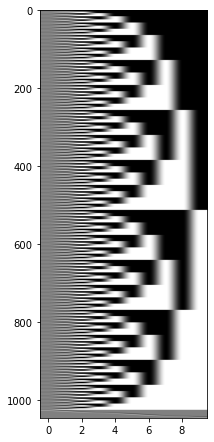

In [116]:
# if not len(systems) == len(myDOE.columns):
#     print("DOE does not match input...")
#     exit()
# else:
myDOE = pd.DataFrame(myCCD, columns=input.iloc[:,0].tolist())
from matplotlib import pyplot as plt
import numpy as np

# Set the figure size
plt.rcParams["figure.figsize"] = [3.00, 7.50]
# plt.rcParams["figure.autolayout"] = True

# Random data points
data = np.random.rand(5, 5)

# Plot the data using imshow with gray colormap
plt.imshow(myDOE, cmap='gray',  aspect='auto')

# Display the plot
plt.show()


In [117]:
for i, system in enumerate(systems):
    # print (system.name)
    # print (system.min)
    # print (system.max)
    myDOE.loc[myDOE[SystemNames[i]] == -1, SystemNames[i]] = systems[i].Min
    myDOE.loc[myDOE[SystemNames[i]] == 0, SystemNames[i]] = (systems[i].Min+systems[i].Max)/2
    myDOE.loc[myDOE[SystemNames[i]] == 1, SystemNames[i]] = systems[i].Max

In [118]:
myDOE

,system1,system2,system3,system4,system5,system6,system7,system8,system9,system10
0,10.0,5.0,100.0,5.0,5.0,10.0,15.0,20.0,30.0,30.0
1,200.0,5.0,100.0,5.0,5.0,10.0,15.0,20.0,30.0,30.0
2,10.0,20.0,100.0,5.0,5.0,10.0,15.0,20.0,30.0,30.0
3,200.0,20.0,100.0,5.0,5.0,10.0,15.0,20.0,30.0,30.0
4,10.0,5.0,200.0,5.0,5.0,10.0,15.0,20.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...
1040,105.0,12.5,150.0,7.5,27.5,25.0,37.5,50.0,30.0,65.0
1041,105.0,12.5,150.0,7.5,27.5,25.0,37.5,50.0,100.0,65.0
1042,105.0,12.5,150.0,7.5,27.5,25.0,37.5,50.0,65.0,30.0
1043,105.0,12.5,150.0,7.5,27.5,25.0,37.5,50.0,65.0,100.0


In [119]:
myDOE.to_csv("CCD_DOE.csv")